#📌 Extracão

In [1]:
import pandas as pd

df = pd.read_json('/content/TelecomX_Data.json')
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# Normalize the nested columns
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenate the normalized dataframes with the original dataframe
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1), customer_df, phone_df, internet_df, account_df], axis=1)

# Display the first few rows of the updated dataframe
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [3]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

#📊 Carga e análise
### Análise descritiva das variáveis numéricas

#### Subtask:
Calcular estatísticas descritivas (média, mediana, desvio padrão, etc.) para as colunas numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`).


In [5]:
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
display(df[numeric_cols].describe())

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7256.000000
mean,32.346498,64.720098,2280.634213
std,24.571773,30.129572,2268.632997
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,400.225000
50%,29.000000,70.300000,1391.000000
75%,55.000000,89.875000,3785.300000
max,72.000000,118.750000,8684.800000


## Visualização das variáveis numéricas

Histogramas ou box plots para visualizar a distribuição das variáveis numéricas.


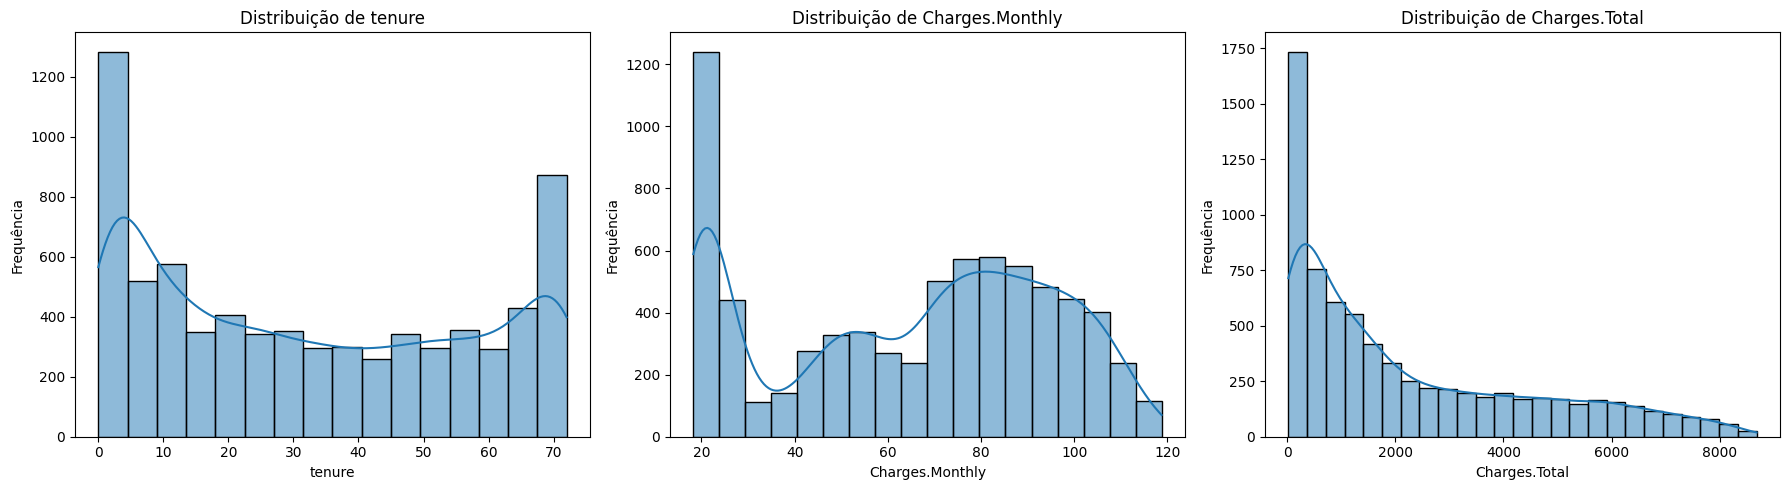

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

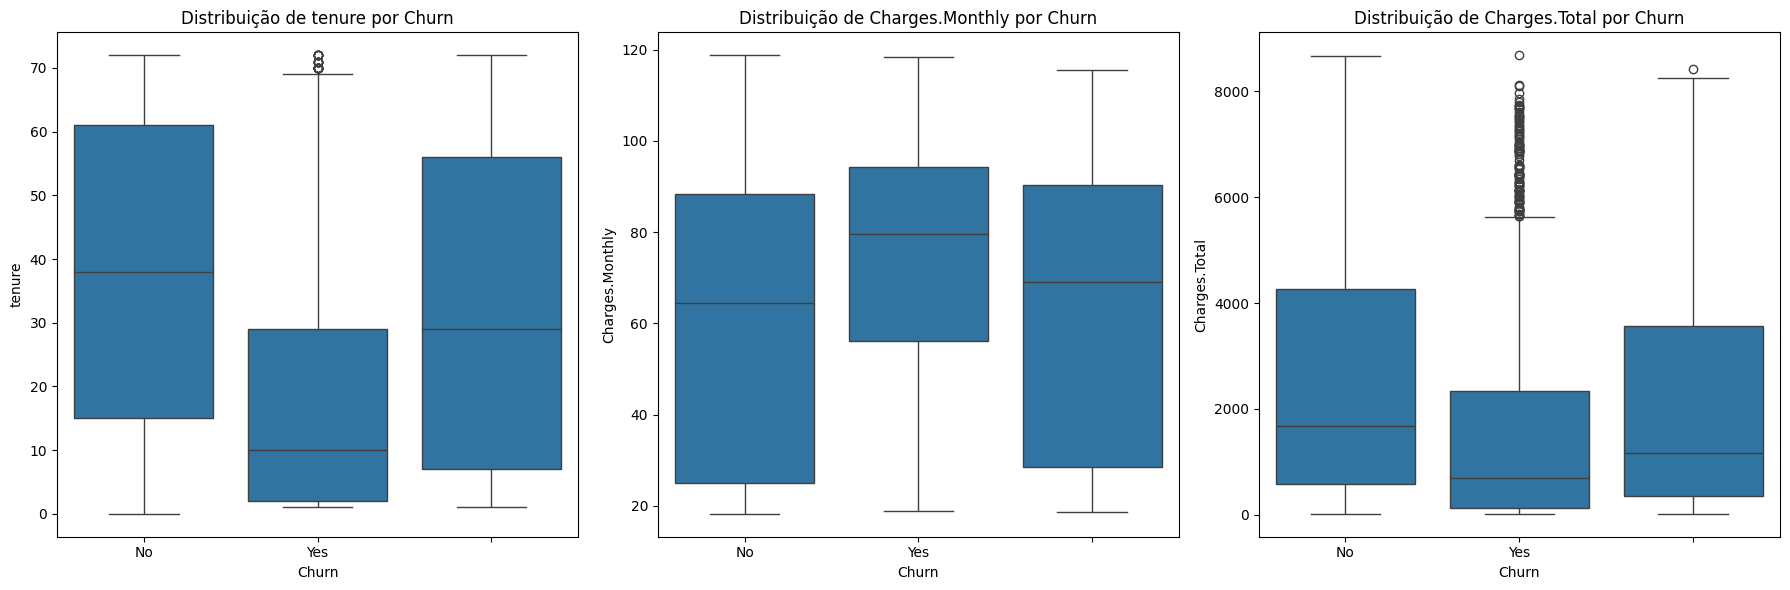

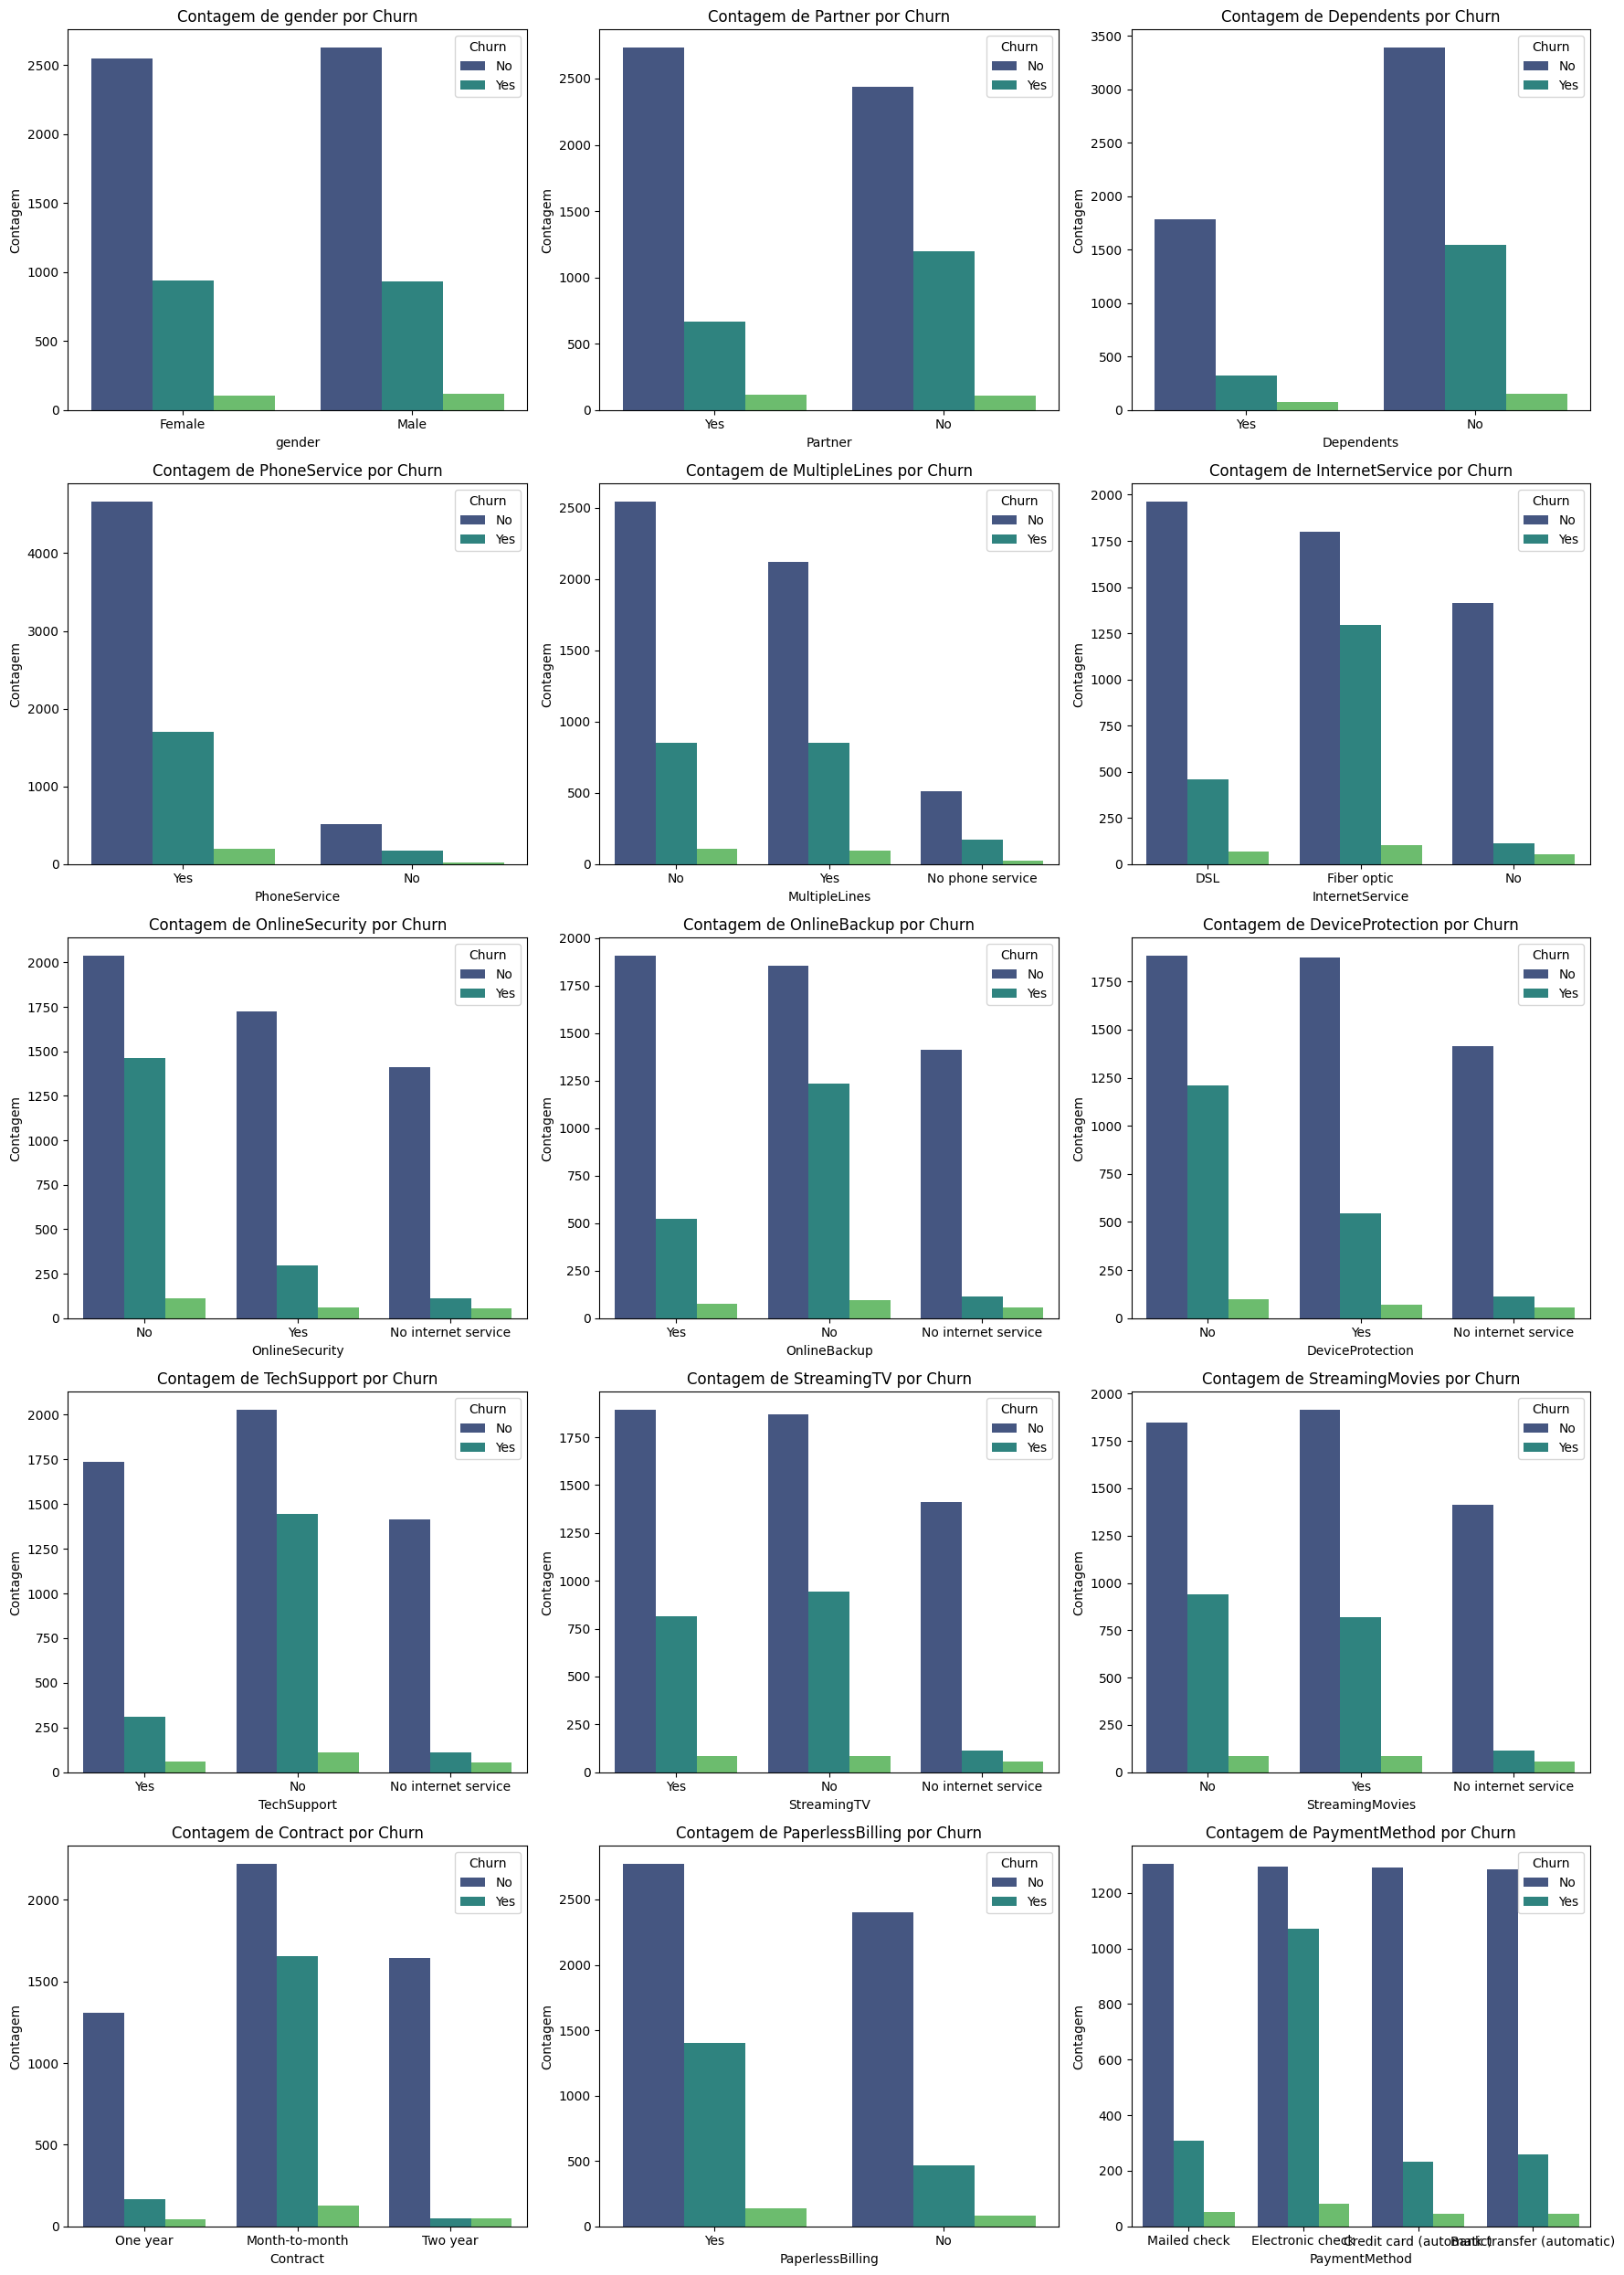

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables for box plots
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Categorical variables for bar plots
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Contagem de {col} por Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    if len(df[col].unique()) > 5:
        axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#📄Relatorio Final


*   Clientes que churnaram tendem a ter um tempo de serviço (`tenure`) significativamente menor do que aqueles que não churnaram.
*   Clientes que churnaram apresentam cobranças mensais (`Charges.Monthly`) geralmente mais altas em comparação com os que não churnaram.
*   Clientes idosos (`SeniorCitizen` = 1) parecem ter uma taxa de churn maior do que clientes não idosos.
*   Clientes sem parceiro e sem dependentes parecem ter uma maior probabilidade de churnar.
*   Clientes com serviço de internet Fibra Óptica (`InternetService` = Fiber optic) apresentam uma taxa de churn consideravelmente maior.
*   Clientes que não assinam serviços adicionais de internet (Segurança Online, Backup Online, Proteção de Dispositivo, Suporte Técnico) têm uma taxa de churn significativamente mais alta.
*   Clientes com contrato Mês a Mês (`Contract` = Month-to-month) têm uma taxa de churn muito mais alta do que aqueles com contratos de Um Ano ou Dois Anos.
*   Clientes que utilizam Cheque Eletrônico (`PaymentMethod` = Electronic check) como método de pagamento apresentam a maior taxa de churn.

### Insights ou Proximos Passos

*   Investigar as causas da alta rotatividade entre clientes com serviço de internet Fibra Óptica e aqueles que utilizam Cheque Eletrônico, possivelmente buscando feedback direto desses clientes.
*   Desenvolver estratégias de retenção direcionadas para clientes com baixo tempo de serviço, contrato Mês a Mês e que não utilizam serviços adicionais de internet, talvez oferecendo incentivos para contratos de longo prazo ou a adição de serviços.

# Análise Exploratória de Dados de Churn de Clientes

Este notebook contém uma análise exploratória de dados de clientes de uma empresa de telecomunicações com o objetivo de identificar padrões e fatores que contribuem para o *churn* (cancelamento de serviço).

## 📌 Extração

Os dados foram carregados a partir de um arquivo JSON (`TelecomX_Data.json`). A estrutura do JSON incluía campos aninhados (`customer`, `phone`, `internet`, `account`).

In [ ]:
# Normalize the nested columns
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Concatenate the normalized dataframes with the original dataframe
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1), customer_df, phone_df, internet_df, account_df], axis=1)

# Display the first few rows of the updated dataframe
display(df.head())

In [ ]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
display(df.info())

In [ ]:
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
display(df[numeric_cols].describe())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical variables for box plots
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Categorical variables for bar plots
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Contagem de {col} por Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    if len(df[col].unique()) > 5:
        axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Análise Exploratória de Dados de Churn de Clientes

Este notebook realiza uma Análise Exploratória de Dados (AED) em um conjunto de dados de clientes de uma empresa de telecomunicações. O objetivo é identificar padrões, tendências e fatores que influenciam o *churn* (cancelamento de serviço) dos clientes, fornecendo insights para estratégias de retenção.

## 📌 Extração

Os dados foram extraídos de um arquivo JSON (`TelecomX_Data.json`). O conjunto de dados original continha informações de clientes, mas com alguns campos aninhados, como detalhes do cliente, telefone, internet e conta.

## 🔧 Transformação

Nesta etapa, os dados foram transformados para facilitar a análise:

1.  **Normalização de Dados Aninhados:** Os campos aninhados (`customer`, `phone`, `internet`, `account`) foram normalizados usando `pd.json_normalize()` para extrair as informações e criar novas colunas no DataFrame principal.
2.  **Concatenação de DataFrames:** Os DataFrames normalizados foram concatenados com o DataFrame original, removendo as colunas aninhadas originais.
3.  **Conversão de Tipo de Dados:** A coluna `Charges.Total` foi convertida para o tipo numérico (`float64`) usando `pd.to_numeric`. O parâmetro `errors='coerce'` foi utilizado para tratar quaisquer valores que não pudessem ser convertidos, substituindo-os por `NaN`.

## 📊 Carga e Análise

Os dados transformados foram carregados em um DataFrame pandas para análise.

### Análise Descritiva das Variáveis Numéricas

Foram calculadas estatísticas descritivas (média, mediana, desvio padrão, mínimo, máximo, quartis) para as colunas numéricas relevantes: `tenure`, `Charges.Monthly` e `Charges.Total`. Isso fornece um resumo da distribuição central, dispersão e alcance dessas variáveis.

### Visualização das Variáveis Numéricas

Para visualizar a distribuição das variáveis numéricas e entender sua relação com o churn, foram gerados:

*   **Histogramas:** Plotados para `tenure`, `Charges.Monthly` e `Charges.Total` para mostrar a frequência de valores em diferentes intervalos. A linha KDE (Kernel Density Estimate) foi adicionada para visualizar a distribuição de probabilidade.
*   **Box Plots:** Gerados para `tenure`, `Charges.Monthly` e `Charges.Total` em relação à variável `Churn`. Isso permite comparar a distribuição dessas variáveis entre clientes que churnaram (Yes) e aqueles que não churnaram (No), identificando possíveis diferenças significativas.

### Visualização das Variáveis Categóricas

Para analisar a relação entre as variáveis categóricas e o churn, foram criados gráficos de contagem (`countplot`) para cada coluna categórica (excluindo `customerID` e `Churn`), com a variável `Churn` como `hue`. Isso mostra a contagem de clientes em cada categoria, dividida por status de churn. As colunas categóricas analisadas incluem: `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, e `PaymentMethod`.

## 📄 Relatório Final

Com base na análise exploratória, foram identificados os seguintes insights principais relacionados ao churn:

*   Clientes que churnaram tendem a ter um tempo de serviço (`tenure`) significativamente menor do que aqueles que não churnaram.
*   Clientes que churnaram apresentam cobranças mensais (`Charges.Monthly`) geralmente mais altas em comparação com os que não churnaram.
*   Clientes idosos (`SeniorCitizen` = 1) parecem ter uma taxa de churn maior do que clientes não idosos.
*   Clientes sem parceiro e sem dependentes parecem ter uma maior probabilidade de churnar.
*   Clientes com serviço de internet Fibra Óptica (`InternetService` = Fiber optic) apresentam uma taxa de churn consideravelmente maior.
*   Clientes que não assinam serviços adicionais de internet (Segurança Online, Backup Online, Proteção de Dispositivo, Suporte Técnico) têm uma taxa de churn significativamente mais alta.
*   Clientes com contrato Mês a Mês (`Contract` = Month-to-month) têm uma taxa de churn muito mais alta do que aqueles com contratos de Um Ano ou Dois Anos.
*   Clientes que utilizam Cheque Eletrônico (`PaymentMethod` = Electronic check) como método de pagamento apresentam a maior taxa de churn.

### Insights e Próximos Passos

A análise sugere que fatores como tempo de serviço, tipo de contrato, tipo de serviço de internet, serviços adicionais e método de pagamento estão fortemente associados ao churn. Os próximos passos podem incluir:

*   Investigar as causas subjacentes da alta rotatividade entre clientes com serviço de internet Fibra Óptica e aqueles que utilizam Cheque Eletrônico, possivelmente através de pesquisas de satisfação ou análise de dados de suporte.
*   Desenvolver e implementar estratégias de retenção direcionadas para segmentos de clientes de alto risco, como aqueles com baixo tempo de serviço, contrato Mês a Mês e que não utilizam serviços adicionais de internet. Isso pode incluir ofertas de incentivos para migração para contratos de longo prazo ou a adição de serviços, além de melhorias na qualidade do serviço de Fibra Óptica e na experiência de pagamento com Cheque Eletrônico.
*   Construir um modelo preditivo de churn utilizando as variáveis identificadas nesta AED para prever quais clientes têm maior probabilidade de churnar, permitindo ações proativas de retenção.